### Lesson 03 Assignment

Import required libraries:

In [288]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from itertools import groupby

# Permit display of all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Declare probabilities and functions:

In [302]:
# in the 3-door simulation, doors are randomly chosen with equal probability from 3 doors
# when pval is approximately 0.333
door_probas = [
      .333,  # door 1
      .333,  # door 2
      .333,  # door 3
  ]

# when Monte has a choice of doors, doors are randomly chosen with equal probability from 2 doors
# when pval is 0.5
monte_probas = [
      .5,  # first of two unchosen doors (doors 1 or 2)
      .5,  # second of two unchosen doors (doors 2 or 3)
  ]

# Param 1 door_probas: list of probabilities that a given door will be selected
# Returns: independent selection of one door out of three
# randomly select one door out of three possible doors
# used for placing the car behind one door and the contestant's selection of one door
def sim_door(door_probas):
    return list(zip(
        ['door 1', 'door 2', 'door 3'], 
        np.random.multinomial(1, door_probas)))

# Param 1 monte_probas: list of probabilities that a given door will be selected
# Param 2 available_doors: list of doors without cars from which to select
# Returns: independent selection of one door out of two doors without the car
# called when Monte has a choice of two doors, to independently select one of the doors
def sim_monte(monte_probas, available_doors):
    # note: the multinomial distribution is the general case of the binomial distribution, 
    # so calling it is fine here
    return list(zip(
        available_doors, 
        np.random.multinomial(1, monte_probas)))

# Param 1 car_placement: list of tuples of door and whether that door has the car
# Param 2 car_door: the door with the car, e.g. 'door 1'
# Param 3 contestant_choice: the door initially chosen by the contestant, e.g. 'door 2'
# Returns: list of doors that Monte can open: doors without the car and not chosen by the contestant
# contains either a single door, if Monte has no choice, or two doors, if Monte has a choice
def doors_monte_can_open(car_placement, car_door, contestant_choice):
    return [t for t in car_placement if t[0] != contestant_choice and t[0] != car_door]

# Param do_switch: whether or not the contestant switches after Monte opens one door
# Returns: 'car' or 'goat'
# simulate car placement and initial contestant choice, Monte opening one of the unchosen doors,
# and the result of the contestants choice to switch or not to switch
def sim_game(do_switch):
    # set up the initial placement of the car
    car_placement = sim_door(door_probas)
    
    # retrieve the door that has the car, e.g. 'door 1', 'door 2', 'door 3'
    car_door = [t[0] for t in car_placement if t[1] == 1][0]

    # independently retrieve the door chosen by the contestant, e.g. 'door 1', 'door 2', 'door 3'
    contestant_choice = [t[0] for t in sim_door(door_probas) if t[1] == 1][0]

    # retrieve list of doors Monte can open based on car placement and contestant choice
    openable_doors = doors_monte_can_open(car_placement, car_door, contestant_choice)
    #print(car_placement)
    #print(car_door)
    #print(contestant_choice)
    #print(openable_doors)
    if len(openable_doors) > 1:
        # Contestant guessed right, Monte has a choice!
        monte_opens = [t[0] for t in sim_monte(monte_probas, openable_doors) if t[1] == 1][0]
    else:
        # Contestant guessed wrong, Monte must pick the only available door, the door without the car
        monte_opens = openable_doors[0]
    opened_door = monte_opens[0]

    # If contestant chooses to switch, they get the only unopened, unguessed door
    if do_switch:
        contestant_choice = \
            [t[0] for t in car_placement if t[0] != contestant_choice and t[0] != opened_door][0]

    # return True if contestant's choice matches the door with the car
    return 'car' if car_door == contestant_choice else 'goat'

def run_games(num_games, do_switch):
    return pd.Series(Counter([sim_game(do_switch) for i in range(0, num_games)]))

def run_samples(num_samples, num_games, do_switch):
    return pd.DataFrame([run_games(num_games, do_switch) for i in range(0, num_samples)])

In [330]:
GAMES_PER_SAMPLE = 100
NUMBER_OF_SAMPLES = 10

In [331]:
switch_samples = run_samples(NUMBER_OF_SAMPLES, GAMES_PER_SAMPLE, True)
switch_samples

,car,goat
0,70,30
1,67,33
2,65,35
3,69,31
4,70,30
5,62,38
6,62,38
7,54,46
8,73,27
9,69,31


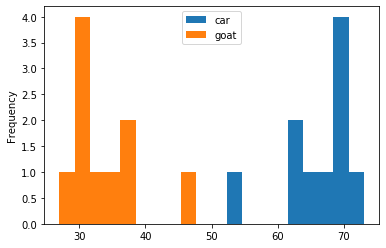

In [337]:
switch_samples.plot.hist(bins=20)

30.77

30.77

<BarContainer object of 2 artists>

Text(0.5, 0, 'Prizes')

Text(0, 0.5, 'Probability of Winning')

Text(0.5, 0.98, 'Probability of Winning a Car vs. a Goat When Contestant Switches')

Text(0.5, 1.0, '100 Games per Sample, 10 Samples')

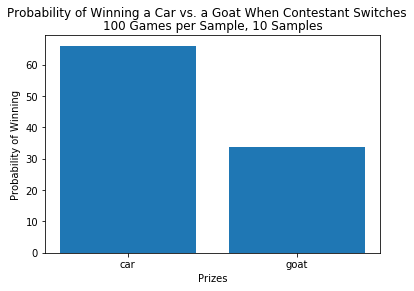

In [333]:
mean_car = switch_samples['car'].mean()
mean_goat = switch_samples['goat'].mean()
round(switch_samples['car'].var(), 2)
round(switch_samples['goat'].var(), 2)
plt.bar(['car', 'goat'], [mean_car, mean_goat])
plt.xlabel('Prizes')
plt.ylabel('Probability of Winning')
plt.suptitle('Probability of Winning a Car vs. a Goat When Contestant Switches')
plt.title(str(GAMES_PER_SAMPLE) + ' Games per Sample, ' + str(NUMBER_OF_SAMPLES) + ' Samples')

In [332]:
no_switch_samples = run_samples(NUMBER_OF_SAMPLES, GAMES_PER_SAMPLE, False)
no_switch_samples

,car,goat
0,35,65
1,32,68
2,33,67
3,31,69
4,37,63
5,26,74
6,24,76
7,40,60
8,31,69
9,28,72


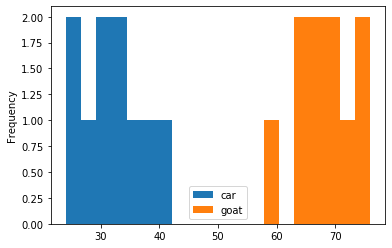

In [338]:
no_switch_samples.plot.hist(bins=20)

24.01

24.01

<BarContainer object of 2 artists>

Text(0.5, 0, 'Prizes')

Text(0, 0.5, 'Probability of Winning')

Text(0.5, 0.98, 'Probability of Winning a Car vs. a Goat When Contestant Does Not Switch')

Text(0.5, 1.0, '100 Games per Sample, 10 Samples')

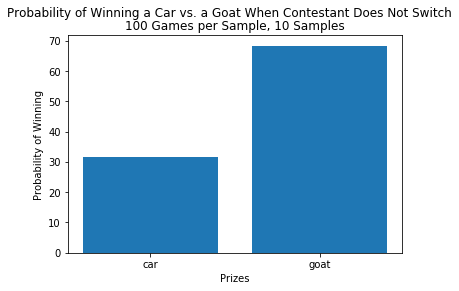

In [334]:
mean_car = no_switch_samples['car'].mean()
mean_goat = no_switch_samples['goat'].mean()
round(no_switch_samples['car'].var(), 2)
round(no_switch_samples['goat'].var(), 2)
plt.bar(['car', 'goat'], [mean_car, mean_goat])
plt.xlabel('Prizes')
plt.ylabel('Probability of Winning')
plt.suptitle('Probability of Winning a Car vs. a Goat When Contestant Does Not Switch')
plt.title(str(GAMES_PER_SAMPLE) + ' Games per Sample, ' + str(NUMBER_OF_SAMPLES) + ' Samples')

After choosing an initial door, the best strategy is to switch after Monte opens one of the remaining doors. Why?

TODO

Must consider the following independent probabilities:

Probability that the car is behind the initial door chosen by the contestant:

To simulate, randomly place the car behind one of two doors.

Then, let the contestant randomly choose one of the three doors.

After the contestant chooses a door, there are two scenarios for Monte, one in which he has a choice of doors and one in which must open the only door without the car, and two scenarios for the contestant, one in which s/he switches and one in which s/he does not switch:

Scenario 1: the contestant has chosen the door with the car. Monte may then choose randomly between the remaining two doors.

Scenario 2: the contestant has chosen a door without the car. Monte then has no choice as to which door to open.

Consider distributions: initial placement of car and contestant's initial choice: 

### Scenario 1: The Contestant Does Not Switch

To simulate, randomly place the car behind one of two doors.

In [229]:
sim_game(True)

[('door 1', 1), ('door 2', 0), ('door 3', 0)]
door 1
door 3
[('door 2', 0)]
door 1


'car'

Then, let the contestant randomly choose one of the three doors.

In [44]:
contestant_door = [t[0] for t in sim_door(1, door_probas) if t[1] == 1]

### Scenario 2: The Contestant Switches